<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/from_Solution_Homework_to_Regression_withSCALER_and_scaledLabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-23 10:28:30--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.207, 108.177.11.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M   190MB/s    in 3.5s    

2023-10-23 10:28:34 (188 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1903.0,1825,5.0,2340,WN,3327,...,4.0,12.0,0,NaN,0,3.0,0.0,0.0,0.0,22.0
1,2008,1,3,4,2100.0,1945,2255.0,2150,WN,2991,...,4.0,8.0,0,NaN,0,48.0,0.0,0.0,0.0,17.0
2,2008,1,3,4,2207.0,2125,2307.0,2225,WN,2211,...,3.0,8.0,0,NaN,0,17.0,0.0,0.0,0.0,25.0
3,2008,1,3,4,1911.0,1850,2054.0,2045,WN,102,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,2143.0,2105,2227.0,2150,WN,907,...,4.0,10.0,0,NaN,0,37.0,0.0,0.0,0.0,0.0


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68820 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68703 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69304 non-null  object 
 11  ActualElapsedTime  68672 non-null  float64
 12  CRSElapsedTime     70088 non-null  float64
 13  AirTime            68672 non-null  float64
 14  ArrDelay           68672 non-null  float64
 15  DepDelay           68820 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.00,2008.0
Month,70096.0,6.380764,3.401538,1.0,3.0,6.0,9.00,12.0
DayofMonth,70096.0,15.705361,8.779344,1.0,8.0,16.0,23.00,31.0
DayOfWeek,70096.0,3.918754,1.985590,1.0,2.0,4.0,6.00,7.0
DepTime,68820.0,1328.505449,477.151812,1.0,925.0,1323.0,1723.00,2400.0
CRSDepTime,70096.0,1320.726675,463.116741,1.0,924.0,1315.0,1710.00,2359.0
ArrTime,68703.0,1476.784871,504.174593,1.0,1103.0,1510.0,1905.00,2400.0
CRSArrTime,70096.0,1488.557935,482.499715,1.0,1110.0,1513.0,1902.00,2400.0
FlightNum,70096.0,2216.911265,1952.340869,1.0,621.0,1569.0,3506.25,7829.0
ActualElapsedTime,68672.0,126.908944,69.815577,15.0,77.0,109.0,157.00,1182.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.380764,3.401538,53.309262
DayofMonth,15.705361,8.779344,55.900299
DayOfWeek,3.918754,1.985590,50.668910
DepTime,1328.505449,477.151812,35.916436
CRSDepTime,1320.726675,463.116741,35.065298
ArrTime,1476.784871,504.174593,34.140016
CRSArrTime,1488.557935,482.499715,32.413902
FlightNum,2216.911265,1952.340869,88.065810
ActualElapsedTime,126.908944,69.815577,55.012338


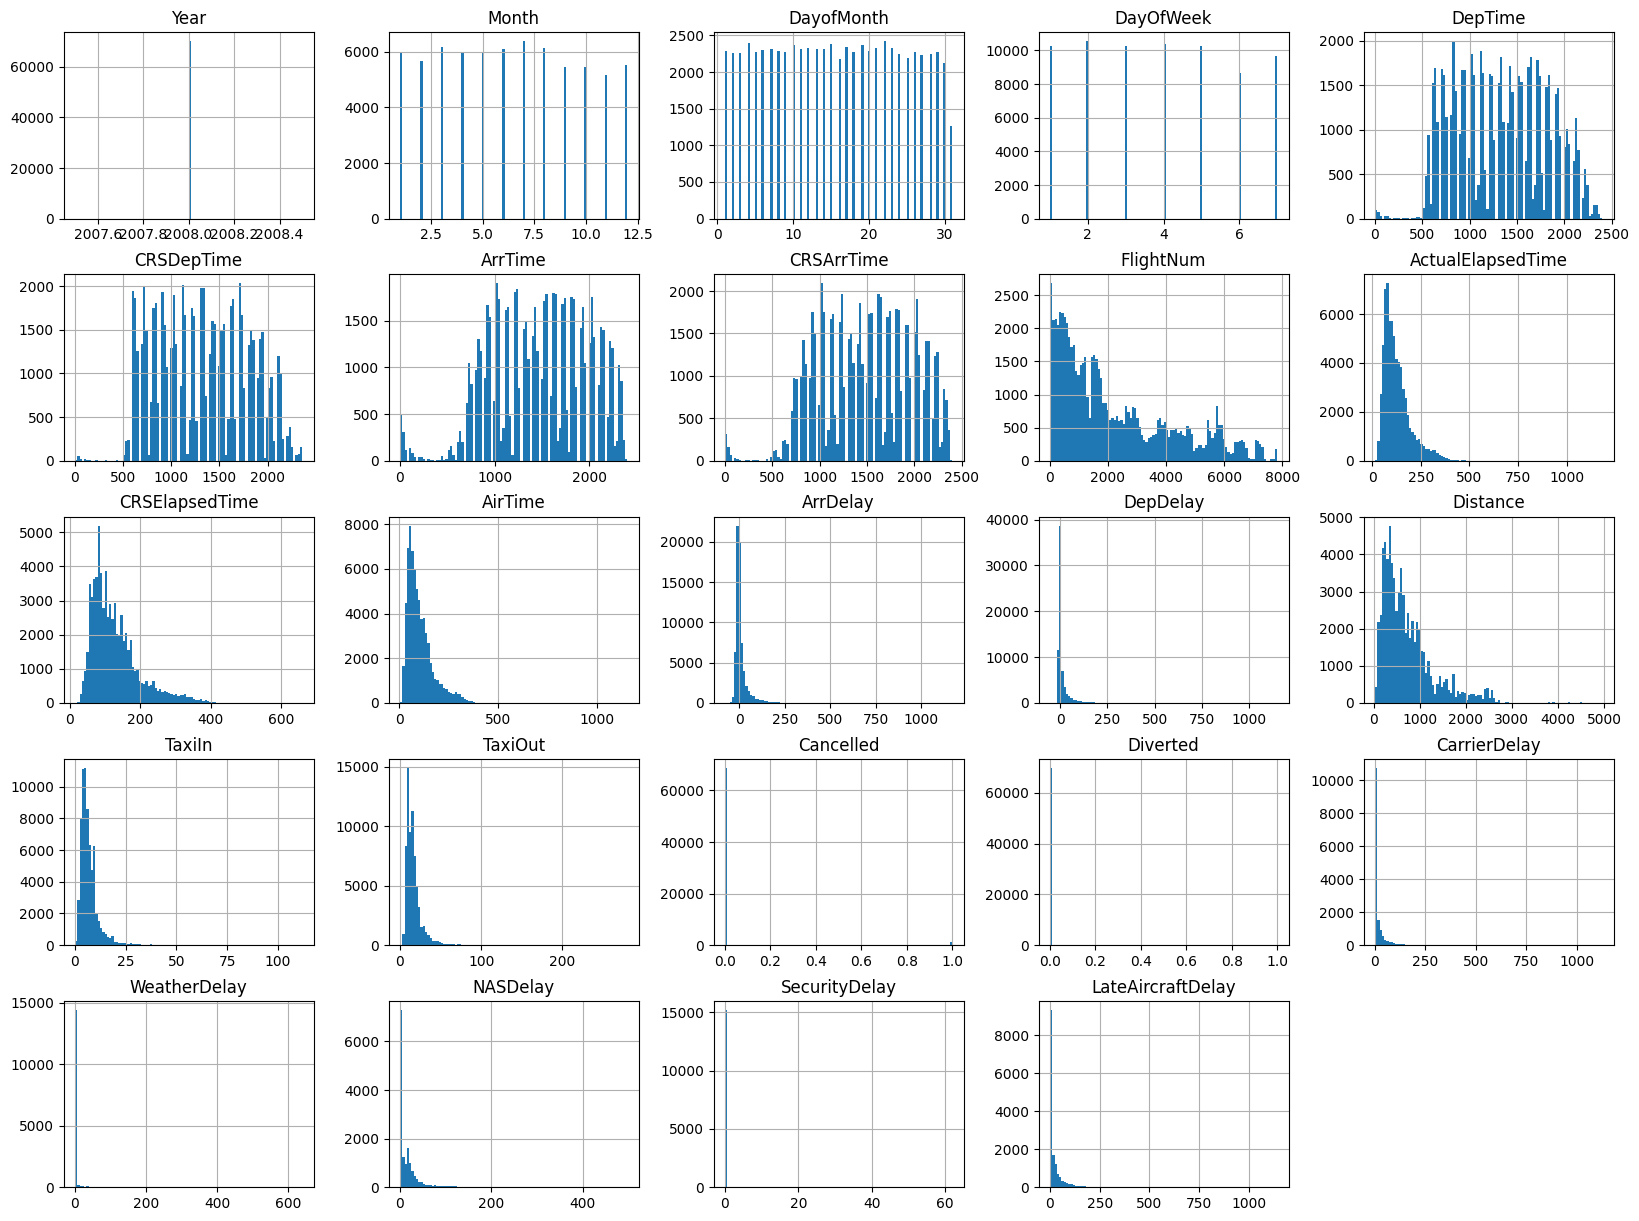

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [14]:
## Feature Engineering, Model Training and Evaluation

In [15]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [16]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [17]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [18]:
max_ArrDelay = raw_pd['ArrDelay'].max()
min_ArrDelay = raw_pd['ArrDelay'].min()

In [19]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [20]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))

In [21]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [22]:
raw_pd['ArrDelay'] = raw_pd['ArrDelay'].apply(lambda x:t_normalized_ArrDelay(x))

In [23]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [24]:
final_pd = features_pd.dropna()

In [25]:
final_pd.count()

UniqueCarrier    68672
Origin           68672
Dest             68672
DepTime          68672
TaxiOut          68672
TaxiIn           68672
DepDelay         68672
DayOfWeek        68672
Distance         68672
ArrDelay         68672
dtype: int64

In [26]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,LAS,MSY,18.00-24.00,12.0,4.0,38.0,4,0.298541,0.083333
1,WN,LAS,PHX,18.00-24.00,8.0,4.0,75.0,4,0.046210,0.115385
2,WN,LAS,SAN,18.00-24.00,8.0,3.0,42.0,4,0.046615,0.096955
3,WN,MCI,SMF,18.00-24.00,10.0,5.0,21.0,4,0.286583,0.070513
4,WN,MCO,RSW,18.00-24.00,10.0,4.0,38.0,4,0.021281,0.092949
5,WN,MCO,STL,12.00-17.59,10.0,3.0,24.0,4,0.172679,0.073718
6,WN,OAK,LAX,18.00-24.00,16.0,6.0,67.0,4,0.062627,0.116186
7,WN,OAK,ONT,06.00-11.59,8.0,3.0,4.0,4,0.067491,0.065705
8,WN,OAK,SNA,NA,NaN,NaN,NaN,4,0.069518,NaN
9,WN,ONT,SJC,06.00-11.59,12.0,3.0,0.0,4,0.061816,0.059295


In [27]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [28]:
#final_pd = noNull_pd

In [29]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [30]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [31]:
test_df = final_pd.drop(train_df.index)

In [32]:
train_df.count()

UniqueCarrier    54938
Origin           54938
Dest             54938
DepTime          54938
TaxiOut          54938
TaxiIn           54938
DepDelay         54938
DayOfWeek        54938
Distance         54938
ArrDelay         54938
dtype: int64

In [33]:
test_df.count()

UniqueCarrier    13734
Origin           13734
Dest             13734
DepTime          13734
TaxiOut          13734
TaxiIn           13734
DepDelay         13734
DayOfWeek        13734
Distance         13734
ArrDelay         13734
dtype: int64

In [34]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [35]:
type(train_labels)

pandas.core.frame.DataFrame

In [36]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [37]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [38]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [39]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', LinearRegression())])
pipeline_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 0.007336124963235987
	 R2 score: 0.9466972565801587
